In [1]:
!pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 14.5 MB/s eta 0:00:00


In [36]:
!pip install empath

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57799 sha256=5c182e600270e6a95a10aac6d6504d6284a5ec71b4950892ccc6c32e47c00cce
  Stored in directory: /root/.cache/pip/wheels/b5/93/85/f4e8694df404eb214060dd0e0f3fda14398638f5835b3dde23
Successfully built empath


In [2]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [80]:
!pip install imblearn xgboost

In [77]:
!pip install xgboost

In [3]:
import asyncpraw
import asyncio

client_id = "qkA4w7yegrZShJNJym7SMA"
client_secret = "vmvaxSO--Y7XYlwFS81qRel3iMkj8Q"
user_agent = "Any-Turn-9574"

async def create_reddit_instance():
    try:
        reddit = asyncpraw.Reddit(
            client_id=client_id,
            client_secret=client_secret,
            user_agent=user_agent,
        )
        print("Reddit instance created successfully.")
        return reddit
    except Exception as e:
        print(f"Error creating Reddit instance: {e}")
        return None

reddit = await create_reddit_instance()

Reddit instance created successfully.


In [4]:
subreddits = [
    "SuicideWatch", "depression", "offmychest", "mentalhealth", "DecidingToBeBetter", "selfimprovement",
    "anxiety", "lonely", "traumatoolbox", "bipolar", "socialanxiety", "BPD", "OCD", "mentalhealthuk",
    "TrueOffMyChest", "confession", "relationship_advice", "vent", "Advice", "lifeishell", "Needafriend",
    "depression_help", "KindVoice", "SuicideBereavement", "CPTSD"
]

In [7]:
import asyncpraw
import asyncio
from asyncprawcore.exceptions import NotFound # Import NotFound from asyncprawcore.exceptions

async def scrape_reddit_data(reddit, subreddits):
    posts = []
    for sub_name in subreddits:
        try:
            subreddit = await reddit.subreddit(sub_name)
            submissions_count = 0
            async for submission in subreddit.top(limit=10, time_filter='week'):
                submissions_count += 1
                print(f"Processing submission: {submission.title}") # Debug print
                # Explicitly load the submission data
                await submission.load()
                # Use submission.comments.list() to get a flattened list of comments
                try:
                    # Fetch all comments using list() and then limit
                    all_comments = await submission.comments.list()
                    print(f"Fetched {len(all_comments)} comments for submission: {submission.title}") # Debug print
                    # Limit the number of comments to process after fetching the list
                    for i, comment in enumerate(all_comments):
                        if i >= 50: # Limit to processing first 50 comments from the flattened list
                            break
                        # Ensure we only append Comment objects
                        if isinstance(comment, asyncpraw.models.Comment):
                            posts.append({
                                'title': submission.title,
                                'body': submission.selftext,
                                'comment': comment.body
                            })
                        # Removed the check for MoreComments here as list() should handle them

                except Exception as e:
                    print(f"  Error fetching comments list for submission {submission.title}: {e}") # Debug print

            print(f"Subreddit r/{sub_name}: Fetched {submissions_count} submissions.") # Debug print

        except NotFound: # Use the imported NotFound exception
            print(f"Subreddit r/{sub_name} not found. Skipping.")
        except Exception as e:
            print(f"An unexpected error occurred while processing r/{sub_name}: {e}")


    return posts

# To run the async function in Colab
if 'reddit' in globals() and reddit is not None:
    scraped_data = await scrape_reddit_data(reddit, subreddits)
    print(f"Scraped {len(scraped_data)} posts and comments.")
else:
    print("Reddit instance not available. Please run the authentication cell first.")

Processing submission: If you’re neurodivergent, this world is not for you.


/tmp/ipython-input-886743117.py:49: DeprecationWarning: `CommentForest.list()` no longer needs to be awaited and this will raise an error in a future version of Async PRAW.
  scraped_data = await scrape_reddit_data(reddit, subreddits)


Fetched 61 comments for submission: If you’re neurodivergent, this world is not for you.
Processing submission: parents said im free to end myself
Fetched 50 comments for submission: parents said im free to end myself
Processing submission: Got raped so I’m doing it tonight
Fetched 56 comments for submission: Got raped so I’m doing it tonight
Processing submission: By 8:30 PM, I will be dead.
Fetched 88 comments for submission: By 8:30 PM, I will be dead.
Processing submission: Suicide is not weak or cowardly
Fetched 62 comments for submission: Suicide is not weak or cowardly
Processing submission: It was way too easy to get a gun. Tonights the night.
Fetched 51 comments for submission: It was way too easy to get a gun. Tonights the night.
Processing submission: People that have committed suicide
Fetched 102 comments for submission: People that have committed suicide
Processing submission: i fantasise about suicide daily
Fetched 29 comments for submission: i fantasise about suicide dai

In [9]:
import pandas as pd
df = pd.DataFrame(scraped_data)
df.to_parquet("reddit_emotions.parquet")
df.head()

,title,body,comment
0,"If you’re neurodivergent, this world is not fo...",I’m 26 and never had a stable job. Went to col...,I fucking hate that idea that neurodivergent p...
1,"If you’re neurodivergent, this world is not fo...",I’m 26 and never had a stable job. Went to col...,"I swear I could’ve wrote this word for word, I..."
2,"If you’re neurodivergent, this world is not fo...",I’m 26 and never had a stable job. Went to col...,I have seen some people on the Internet fetish...
3,"If you’re neurodivergent, this world is not fo...",I’m 26 and never had a stable job. Went to col...,This is why I genuinely wish we were called re...
4,"If you’re neurodivergent, this world is not fo...",I’m 26 and never had a stable job. Went to col...,I'm 32. I was a smart kid. Now I'm a useless a...


In [10]:
import pandas as pd

df = pd.DataFrame(scraped_data)

In [12]:
df.to_csv("reddit_comments.csv", index=False)
from google.colab import files
files.download("reddit_comments.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
df.describe()

,title,body,comment
count,8647,8647,8647
unique,240,236,8410
top,"If you’re neurodivergent, this world is not fo...",,[removed]
freq,50,155,60


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8647 entries, 0 to 8646
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    8647 non-null   object
 1   body     8647 non-null   object
 2   comment  8647 non-null   object
dtypes: object(3)
memory usage: 202.8+ KB


In [15]:
df.isnull().sum()

,0
title,0
body,0
comment,0


In [16]:
import pandas as pd

mask_removed = df['body'].str.lower().isin(['[removed]', '[deleted]'])
mask_comment_removed = df['comment'].str.lower().isin(['[removed]', '[deleted]'])

# Keep only rows where neither body nor comment is removed/deleted
df_clean = df[~(mask_removed | mask_comment_removed)].copy()

# Check how many rows were removed
print(f"Rows before cleaning: {len(df)}")
print(f"Rows after removing [removed]/[deleted]: {len(df_clean)}")

df_clean.reset_index(drop=True, inplace=True)

# Save the cleaned data for later use
df_clean.to_csv("reddit_comments_cleaned.csv", index=False)

print(df_clean.head())

Rows before cleaning: 8647
Rows after removing [removed]/[deleted]: 8553
                                               title  \
0  If you’re neurodivergent, this world is not fo...   
1  If you’re neurodivergent, this world is not fo...   
2  If you’re neurodivergent, this world is not fo...   
3  If you’re neurodivergent, this world is not fo...   
4  If you’re neurodivergent, this world is not fo...   

                                                body  \
0  I’m 26 and never had a stable job. Went to col...   
1  I’m 26 and never had a stable job. Went to col...   
2  I’m 26 and never had a stable job. Went to col...   
3  I’m 26 and never had a stable job. Went to col...   
4  I’m 26 and never had a stable job. Went to col...   

                                             comment  
0  I fucking hate that idea that neurodivergent p...  
1  I swear I could’ve wrote this word for word, I...  
2  I have seen some people on the Internet fetish...  
3  This is why I genuinely wish w

In [17]:
import pandas as pd

# Remove exact duplicates (same title, body, comment)
df_unique = df.drop_duplicates(subset=['title', 'body', 'comment'])
print(f"Removed {len(df) - len(df_unique)} exact duplicate rows.")

# Check posts with multiple different comments by grouping on title+body
comment_counts = df_unique.groupby(['title', 'body']).agg(
    num_comments=pd.NamedAgg(column='comment', aggfunc='nunique')
).reset_index()

# Display how many posts have more than 1 unique comment
multi_comment_posts = comment_counts[comment_counts['num_comments'] > 1]
print(f"Number of posts with multiple distinct comments: {len(multi_comment_posts)}")

# Show some posts with multiple comments
print(multi_comment_posts.head())

# Aggregate comments as a list
df_grouped = df_unique.groupby(['title', 'body']).agg({
    'comment': lambda x: list(x.unique())  # unique comments as list
}).reset_index()

print(f"Dataset shrunk from {len(df_unique)} to {len(df_grouped)} by grouping comments.")

print(df_grouped.iloc[0])

Removed 66 exact duplicate rows.
Number of posts with multiple distinct comments: 240
                                               title  \
0  "My trauma isn’t trendy—I lived it before I ha...   
1  15 days without porn, didn’t expect love to be...   
2                                  17f need friends.   
3  18F Need a Friend. Not in a Cute Way. In a Lon...   
4  22f- talk to me and i will trauma dump (respec...   

                                                body  num_comments  
0  People blames i created and fictioned my traum...             2  
1  \nI used to masturbate 2–3 times a day, mostly...            36  
2  .\n\nHiiii, I'm 17F i recently moved to Bangal...            42  
3  I’ve felt a little too quiet lately. Like I co...            31  
4  Hiii happy Thursday 🩷 I’m bored x a million an...            47  
Dataset shrunk from 8581 to 240 by grouping comments.
title      "My trauma isn’t trendy—I lived it before I ha...
body       People blames i created and fictioned

In [18]:
# Create a new column with concatenated comments text
df_grouped['comments_combined'] = df_grouped['comment'].apply(lambda comments: ' '.join(comments).lower())  # lowercase for uniformity

# basic cleaning to remove URLs in combined comments
import re
url_pattern = r'http\S+|www.\S+'
df_grouped['comments_combined'] = df_grouped['comments_combined'].str.replace(url_pattern, '', regex=True)

print(df_grouped[['title', 'body', 'comments_combined']].head())

                                               title  \
0  "My trauma isn’t trendy—I lived it before I ha...   
1  15 days without porn, didn’t expect love to be...   
2                                  17f need friends.   
3  18F Need a Friend. Not in a Cute Way. In a Lon...   
4  22f- talk to me and i will trauma dump (respec...   

                                                body  \
0  People blames i created and fictioned my traum...   
1  \nI used to masturbate 2–3 times a day, mostly...   
2  .\n\nHiiii, I'm 17F i recently moved to Bangal...   
3  I’ve felt a little too quiet lately. Like I co...   
4  Hiii happy Thursday 🩷 I’m bored x a million an...   

                                   comments_combined  
0  \ndear members,\n\nplease keep the [**rules**]...  
1  that's awesome good job op i think that's beau...  
2  reminders to all participants:\n\n- **use caut...  
3  reminders to all participants:\n\n- **use caut...  
4  reminders to all participants:\n\n- **use caut..

In [19]:
import pandas as pd
import re

# Regex pattern to remove URLs
url_pattern = r'http\S+|www\.\S+'

def clean_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()  # lowercase
    text = re.sub(url_pattern, '', text)  # remove URLs
    text = re.sub(r'\s+', ' ', text)  # replace multiple spaces/newlines with single space
    text = text.strip()
    return text

# cleaning title and body directly
df_grouped['title_clean'] = df_grouped['title'].apply(clean_text)
df_grouped['body_clean'] = df_grouped['body'].apply(clean_text)

# For comments (which is a list of comment strings), clean each and concatenate
def clean_and_concat_comments(comment_list):
    if not isinstance(comment_list, list):
        return ''
    cleaned_comments = [clean_text(comment) for comment in comment_list]
    return ' '.join(cleaned_comments)

df_grouped['comments_clean'] = df_grouped['comment'].apply(clean_and_concat_comments)

# create a combined full text field with all text for certain NLP models
df_grouped['full_text'] = df_grouped['title_clean'] + ' ' + df_grouped['body_clean'] + ' ' + df_grouped['comments_clean']

# Verify cleaned text samples
print(df_grouped[['title_clean', 'body_clean', 'comments_clean']].head())

                                         title_clean  \
0  "my trauma isn’t trendy—i lived it before i ha...   
1  15 days without porn, didn’t expect love to be...   
2                                  17f need friends.   
3  18f need a friend. not in a cute way. in a lon...   
4  22f- talk to me and i will trauma dump (respec...   

                                          body_clean  \
0  people blames i created and fictioned my traum...   
1  i used to masturbate 2–3 times a day, mostly o...   
2  . hiiii, i'm 17f i recently moved to bangalore...   
3  i’ve felt a little too quiet lately. like i co...   
4  hiii happy thursday 🩷 i’m bored x a million an...   

                                      comments_clean  
0  dear members, please keep the [**rules**]( of ...  
1  that's awesome good job op i think that's beau...  
2  reminders to all participants: - **use caution...  
3  reminders to all participants: - **use caution...  
4  reminders to all participants: - **use caution..

In [20]:
df_grouped['title_len'] = df_grouped['title_clean'].apply(len)
df_grouped['body_len'] = df_grouped['body_clean'].apply(len)
df_grouped['comments_len'] = df_grouped['comments_clean'].apply(len)
df_grouped['num_comments'] = df_grouped['comment'].apply(len)
df_grouped['avg_comment_len'] = df_grouped['comments_len'] / df_grouped['num_comments'].replace(0, 1)

In [21]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# VADER sentiment scores for each text
df_grouped['title_sentiment'] = df_grouped['title_clean'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_grouped['body_sentiment'] = df_grouped['body_clean'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_grouped['comments_sentiment'] = df_grouped['comments_clean'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_grouped['full_text_sentiment'] = df_grouped['full_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [22]:
df_grouped.head()

,title,body,comment,comments_combined,title_clean,body_clean,comments_clean,full_text,title_len,body_len,comments_len,num_comments,avg_comment_len,title_sentiment,body_sentiment,comments_sentiment,full_text_sentiment
0,"""My trauma isn’t trendy—I lived it before I ha...",People blames i created and fictioned my traum...,"[\nDear members,\n\nPlease keep the [**rules**...","\ndear members,\n\nplease keep the [**rules**]...","""my trauma isn’t trendy—i lived it before i ha...",people blames i created and fictioned my traum...,"dear members, please keep the [**rules**]( of ...","""my trauma isn’t trendy—i lived it before i ha...",62,2390,1632,2,816.000000,-0.4215,-0.4594,0.9882,0.9894
1,"15 days without porn, didn’t expect love to be...","\nI used to masturbate 2–3 times a day, mostly...","[That's awesome good job op, I think that's be...",that's awesome good job op i think that's beau...,"15 days without porn, didn’t expect love to be...","i used to masturbate 2–3 times a day, mostly o...",that's awesome good job op i think that's beau...,"15 days without porn, didn’t expect love to be...",57,1247,5868,36,163.000000,0.6369,0.9946,0.9998,0.9999
2,17f need friends.,".\n\nHiiii, I'm 17F i recently moved to Bangal...",[REMINDERS TO ALL PARTICIPANTS:\n\n- **USE CAU...,reminders to all participants:\n\n- **use caut...,17f need friends.,". hiiii, i'm 17f i recently moved to bangalore...",reminders to all participants: - **use caution...,"17f need friends. . hiiii, i'm 17f i recently ...",17,282,3092,42,73.619048,0.4767,0.9421,0.9979,0.9983
3,18F Need a Friend. Not in a Cute Way. In a Lon...,I’ve felt a little too quiet lately. Like I co...,[REMINDERS TO ALL PARTICIPANTS:\n\n- **USE CAU...,reminders to all participants:\n\n- **use caut...,18f need a friend. not in a cute way. in a lon...,i’ve felt a little too quiet lately. like i co...,reminders to all participants: - **use caution...,18f need a friend. not in a cute way. in a lon...,54,385,2864,31,92.387097,-0.1974,0.7845,0.9985,0.9983
4,22f- talk to me and i will trauma dump (respec...,Hiii happy Thursday 🩷 I’m bored x a million an...,[REMINDERS TO ALL PARTICIPANTS:\n\n- **USE CAU...,reminders to all participants:\n\n- **use caut...,22f- talk to me and i will trauma dump (respec...,hiii happy thursday 🩷 i’m bored x a million an...,reminders to all participants: - **use caution...,22f- talk to me and i will trauma dump (respec...,56,452,4304,47,91.574468,-0.6597,0.9764,0.9994,0.9997


In [31]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Download model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("monologg/bert-base-cased-goemotions-original")
model = AutoModelForSequenceClassification.from_pretrained("monologg/bert-base-cased-goemotions-original")
id2label = model.config.id2label

def goemotions_emotions(text):
    inputs = tokenizer(text, padding=True, truncation=True, max_length=256, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits.squeeze(0)
        probs = torch.sigmoid(logits)
        # Select top emotions with probability > 0.3
        emotions = [id2label[i] for i, p in enumerate(probs) if p > 0.3]
    return emotions

df_grouped["goemotions"] = df_grouped["full_text"].apply(goemotions_emotions)
print(df_grouped["goemotions"].head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/182 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

0    [realization, neutral]
1       [love, realization]
2           [love, neutral]
3           [love, neutral]
4               [amusement]
Name: goemotions, dtype: object


In [32]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

# Fit-transform on goemotions column (list of lists)
emotion_dummies = pd.DataFrame(mlb.fit_transform(df_grouped['goemotions']),
                               columns=[f'goemotion_{c}' for c in mlb.classes_],
                               index=df_grouped.index)

# Concatenate to main DataFrame
df_grouped = pd.concat([df_grouped, emotion_dummies], axis=1)

print(df_grouped.filter(like='goemotion_').head())

   goemotion_admiration  goemotion_amusement  goemotion_anger  \
0                     0                    0                0   
1                     0                    0                0   
2                     0                    0                0   
3                     0                    0                0   
4                     0                    1                0   

   goemotion_annoyance  goemotion_approval  goemotion_caring  \
0                    0                   0                 0   
1                    0                   0                 0   
2                    0                   0                 0   
3                    0                   0                 0   
4                    0                   0                 0   

   goemotion_confusion  goemotion_curiosity  goemotion_desire  \
0                    0                    0                 0   
1                    0                    0                 0   
2                    0       

In [33]:
df_grouped['num_goemotions'] = df_grouped['goemotions'].apply(len)

In [34]:
df_grouped.head(5)

,title,body,comment,comments_combined,title_clean,body_clean,comments_clean,full_text,title_len,body_len,...,goemotion_nervousness,goemotion_neutral,goemotion_optimism,goemotion_pride,goemotion_realization,goemotion_relief,goemotion_remorse,goemotion_sadness,goemotion_surprise,num_goemotions
0,"""My trauma isn’t trendy—I lived it before I ha...",People blames i created and fictioned my traum...,"[\nDear members,\n\nPlease keep the [**rules**...","\ndear members,\n\nplease keep the [**rules**]...","""my trauma isn’t trendy—i lived it before i ha...",people blames i created and fictioned my traum...,"dear members, please keep the [**rules**]( of ...","""my trauma isn’t trendy—i lived it before i ha...",62,2390,...,0,1,0,0,1,0,0,0,0,2
1,"15 days without porn, didn’t expect love to be...","\nI used to masturbate 2–3 times a day, mostly...","[That's awesome good job op, I think that's be...",that's awesome good job op i think that's beau...,"15 days without porn, didn’t expect love to be...","i used to masturbate 2–3 times a day, mostly o...",that's awesome good job op i think that's beau...,"15 days without porn, didn’t expect love to be...",57,1247,...,0,0,0,0,1,0,0,0,0,2
2,17f need friends.,".\n\nHiiii, I'm 17F i recently moved to Bangal...",[REMINDERS TO ALL PARTICIPANTS:\n\n- **USE CAU...,reminders to all participants:\n\n- **use caut...,17f need friends.,". hiiii, i'm 17f i recently moved to bangalore...",reminders to all participants: - **use caution...,"17f need friends. . hiiii, i'm 17f i recently ...",17,282,...,0,1,0,0,0,0,0,0,0,2
3,18F Need a Friend. Not in a Cute Way. In a Lon...,I’ve felt a little too quiet lately. Like I co...,[REMINDERS TO ALL PARTICIPANTS:\n\n- **USE CAU...,reminders to all participants:\n\n- **use caut...,18f need a friend. not in a cute way. in a lon...,i’ve felt a little too quiet lately. like i co...,reminders to all participants: - **use caution...,18f need a friend. not in a cute way. in a lon...,54,385,...,0,1,0,0,0,0,0,0,0,2
4,22f- talk to me and i will trauma dump (respec...,Hiii happy Thursday 🩷 I’m bored x a million an...,[REMINDERS TO ALL PARTICIPANTS:\n\n- **USE CAU...,reminders to all participants:\n\n- **use caut...,22f- talk to me and i will trauma dump (respec...,hiii happy thursday 🩷 i’m bored x a million an...,reminders to all participants: - **use caution...,22f- talk to me and i will trauma dump (respec...,56,452,...,0,0,0,0,0,0,0,0,0,1


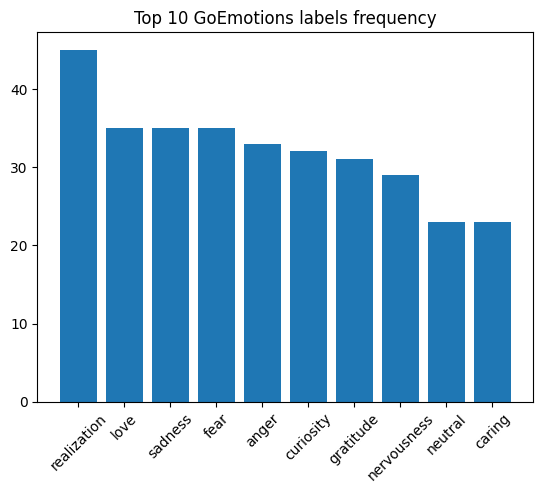

In [35]:
from collections import Counter
import matplotlib.pyplot as plt

all_emotions = sum(df_grouped['goemotions'].tolist(), [])
emotion_freq = Counter(all_emotions)

# Plot top emotions
most_common = emotion_freq.most_common(10)
emotions, counts = zip(*most_common)

plt.bar(emotions, counts)
plt.xticks(rotation=45)
plt.title("Top 10 GoEmotions labels frequency")
plt.show()

In [38]:
from empath import Empath
import pandas as pd

lexicon = Empath()

# Get all Empath analysis results as a list of dictionaries
empath_results_list = df_grouped["full_text"].apply(
    lambda x: lexicon.analyze(x, normalize=True)
).tolist()

# Convert the list of dictionaries to a DataFrame
empath_df = pd.DataFrame(empath_results_list)

# Rename columns to add 'empath_' prefix
empath_df.columns = ["empath_"+cat for cat in empath_df.columns]

# Concatenate the new Empath DataFrame with the existing df_grouped DataFrame
df_grouped = pd.concat([df_grouped, empath_df], axis=1)

print(df_grouped[[col for col in df_grouped.columns if col.startswith('empath_')]].head())

   empath_achievement  empath_achievement  empath_affection  empath_affection  \
0            0.004298            0.000000          0.005731          0.001433   
1            0.001521            0.000760          0.000000          0.012928   
2            0.008117            0.000000          0.000000          0.008117   
3            0.008418            0.001684          0.000000          0.001684   
4            0.004440            0.003330          0.000000          0.008879   

   empath_aggression  empath_aggression  empath_air_travel  empath_air_travel  \
0           0.000000           0.000000           0.000000           0.000000   
1           0.000000           0.000000           0.003042           0.000760   
2           0.001623           0.000000           0.000000           0.001623   
3           0.001684           0.001684           0.000000           0.000000   
4           0.006659           0.000000           0.001110           0.000000   

   empath_alcohol  empath_

In [40]:
from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm.auto import tqdm

model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the 'full_text' column into embeddings
tqdm.pandas()

df_grouped['full_text_embedding'] = df_grouped['full_text'].progress_apply(lambda x: model.encode(x))

df_grouped['full_text_embedding'].head()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

  0%|          | 0/240 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


,full_text_embedding
0,"[0.006832526, -0.09500897, 0.05945684, 0.05297..."
1,"[0.05386517, -0.10007537, 0.037213758, 0.02673..."
2,"[-0.0384635, -0.03870906, 0.015207126, -0.0174..."
3,"[-0.07488482, -0.037128005, 0.060418956, 0.072..."
4,"[-0.049166765, -0.062190972, 0.07164216, 0.040..."


In [41]:
import numpy as np

# Stack embeddings into 2D numpy array
X_embeddings = np.vstack(df_grouped['full_text_embedding'].values)

print(X_embeddings.shape)

(240, 384)


In [42]:
df_grouped.head(1)

,title,body,comment,comments_combined,title_clean,body_clean,comments_clean,full_text,title_len,body_len,...,empath_children,empath_monster,empath_ocean,empath_giving,empath_contentment,empath_writing,empath_rural,empath_positive_emotion,empath_musical,full_text_embedding
0,"""My trauma isn’t trendy—I lived it before I ha...",People blames i created and fictioned my traum...,"[\nDear members,\n\nPlease keep the [**rules**...","\ndear members,\n\nplease keep the [**rules**]...","""my trauma isn’t trendy—i lived it before i ha...",people blames i created and fictioned my traum...,"dear members, please keep the [**rules**]( of ...","""my trauma isn’t trendy—i lived it before i ha...",62,2390,...,0.0,0.0,0.0,0.0,0.004298,0.002865,0.0,0.008596,0.0,"[0.006832526, -0.09500897, 0.05945684, 0.05297..."


In [45]:
import re
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

high_risk_keywords = [
    r"\bsuicide\b", r"\bkill myself\b", r"\bend my life\b", r"\bwant to die\b",
    r"\bcan't go on\b", r"\bno reason to live\b", r"\bhopeless\b", r"\bworthless\b",
    r"\bgive up\b", r"\bwant to disappear\b", r"\bdead inside\b", r"\bthoughts of dying\b",
    r"\bself harm\b", r"\bhang myself\b", r"\bdie tonight\b", r"\baready dead\b",
]

medium_risk_keywords = [
    r"\bdepressed\b", r"\blonely\b", r"\bcrying\b", r"\bpanic attack\b",
    r"\bcan't cope\b", r"\bhelp me\b", r"\bhurt myself\b",
]

negation_patterns = [
    r"\bnot suicidal\b", r"\bno suicidal thoughts\b", r"\bnot going to kill myself\b",
]

def contains_keyword(text, pattern_list):
    for pat in pattern_list:
        if re.search(pat, text):
            return True
    return False

def label_risk(text):
    text = text.lower()

    # Check negations first to avoid false positives
    if contains_keyword(text, negation_patterns):
        return 'low'

    # Check high risk keywords
    if contains_keyword(text, high_risk_keywords):
        return 'high'

    # Check medium risk keywords + sentiment
    sentiment_score = sia.polarity_scores(text)['compound']
    if contains_keyword(text, medium_risk_keywords) and sentiment_score <= -0.3:
        return 'moderate'

    # Otherwise low
    return 'low'


In [46]:
df_grouped['risk_label'] = df_grouped['full_text'].apply(label_risk)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_grouped['risk_encoded'] = le.fit_transform(df_grouped['risk_label'])

print(df_grouped['risk_label'].value_counts())
print(df_grouped[['risk_label', 'risk_encoded']].head())

risk_label
low         127
high         89
moderate     24
Name: count, dtype: int64
  risk_label  risk_encoded
0        low             1
1        low             1
2        low             1
3        low             1
4        low             1


In [54]:
feature_cols = [
    'title_len', 'body_len', 'comments_len', 'num_comments', 'avg_comment_len',
    'title_sentiment', 'body_sentiment', 'comments_sentiment', 'full_text_sentiment',
    'goemotion_nervousness',    'goemotion_neutral',    'goemotion_optimism',   'goemotion_pride',
    'goemotion_realization',    'goemotion_relief',     'goemotion_remorse',    'goemotion_sadness',    'goemotion_surprise',   'num_goemotions',
    'empath_children',  'empath_monster',       'empath_ocean', 'empath_giving',        'empath_contentment',   'empath_writing',       'empath_rural',
    'empath_positive_emotion',  'empath_musical',
]

X_other = df_grouped[feature_cols].fillna(0).values.astype(float)  # Fill any missing values with 0 and cast to float
print(f"Other feature matrix shape: {X_other.shape}")

Other feature matrix shape: (240, 37)


In [72]:
import numpy as np

# Check if any column's first element is a sequence or object (not scalar)
for col in feature_cols:
    val = df_grouped[col].iloc[0]
    if isinstance(val, (list, np.ndarray)):
        print(f"Warning: column '{col}' contains sequence in first row: {val}")

    if str(df_grouped.dtypes[col]) == 'object':
         print(f"Warning: column '{col}' has object dtype.")

In [73]:
import numpy as np

X_embeddings = np.vstack(df_grouped['full_text_embedding'].values)
print(X_embeddings.shape)
print(type(X_embeddings), X_embeddings.dtype)

(240, 384)
<class 'numpy.ndarray'> float32


In [74]:
y = df_grouped['risk_encoded'].values
print(f"Target vector shape: {y.shape}")

Target vector shape: (240,)


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y, stratify=y, random_state=42, test_size=0.2)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (192, 421), Test shape: (48, 421)


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize a classifier
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train on training data
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6458333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.50      0.58        18
           1       0.63      0.88      0.73        25
           2       0.00      0.00      0.00         5

    accuracy                           0.65        48
   macro avg       0.44      0.46      0.44        48
weighted avg       0.59      0.65      0.60        48

Confusion Matrix:
[[ 9  9  0]
 [ 3 22  0]
 [ 1  4  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(
    objective='multi:softmax',      # Softmax for multi-class classification
    num_class=3,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:07:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3, ...)

In [79]:
y_pred = xgb_clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

XGBoost Accuracy: 0.625
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.56      0.59        18
           1       0.66      0.76      0.70        25
           2       0.33      0.20      0.25         5

    accuracy                           0.62        48
   macro avg       0.54      0.51      0.51        48
weighted avg       0.61      0.62      0.61        48

Confusion Matrix:
 [[10  7  1]
 [ 5 19  1]
 [ 1  3  1]]


In [81]:
import numpy as np
import pandas as pd
from collections import Counter
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, stratify=y, test_size=0.2, random_state=42
)

print("Original training label distribution:", Counter(y_train))

# Apply SMOTE on training data to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Resampled training label distribution:", Counter(y_resampled))

# Initialize XGBoost multi-class classifier
xgb_clf = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_resampled)),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Train on resampled data
xgb_clf.fit(X_resampled, y_resampled)

# Predict on original test set
y_pred = xgb_clf.predict(X_test)

# Evaluate performance
print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Original training label distribution: Counter({np.int64(1): 102, np.int64(0): 71, np.int64(2): 19})
Resampled training label distribution: Counter({np.int64(1): 102, np.int64(2): 102, np.int64(0): 102})


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [00:15:05] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy on test set: 0.6458

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.56      0.61        18
           1       0.71      0.68      0.69        25
           2       0.44      0.80      0.57         5

    accuracy                           0.65        48
   macro avg       0.61      0.68      0.62        48
weighted avg       0.67      0.65      0.65        48

Confusion Matrix:
 [[10  6  2]
 [ 5 17  3]
 [ 0  1  4]]


In [104]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score
import numpy as np

xgb_clf = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train)),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42,
)

# Setup parameter distributions for tuning
param_dist = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5],
}

scorer = make_scorer(f1_score, average='macro')

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=30,             # number of combinations to try
    scoring=scorer,
    cv=3,                  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
random_search.fit(X_resampled, y_resampled)

print("Best parameters found:")
print(random_search.best_params_)

# Best estimator
best_xgb = random_search.best_estimator_

# Evaluate on test set
y_pred = best_xgb.predict(X_test)

from sklearn.metrics import classification_report
print("Classification Report on test set:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [01:10:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found:
{'subsample': 0.8, 'scale_pos_weight': 3, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Classification Report on test set:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.96      0.92      0.94        25
           2       0.80      0.80      0.80         5

    accuracy                           0.92        48
   macro avg       0.88      0.89      0.89        48
weighted avg       0.92      0.92      0.92        48



Length of importances array: 421
Length of all_feature_names list: 431


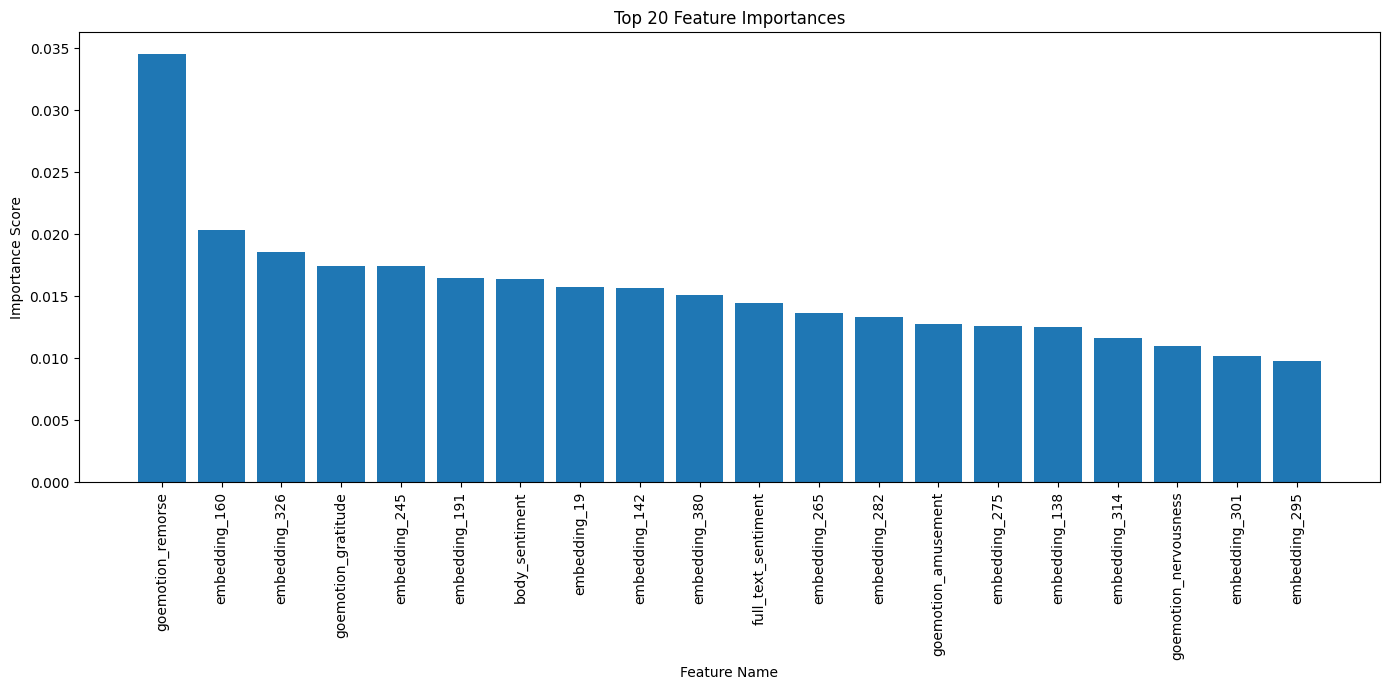

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

if hasattr(random_search.best_estimator_, 'named_steps') and 'classifier' in random_search.best_estimator_.named_steps:
    xgb_trained = random_search.best_estimator_.named_steps['classifier']
else:
    xgb_trained = random_search.best_estimator_


importances = xgb_trained.feature_importances_

embedding_feature_names = [f'embedding_{i}' for i in range(384)]

feature_cols = [
    'title_len', 'body_len', 'comments_len', 'num_comments', 'avg_comment_len',
    'title_sentiment', 'body_sentiment', 'comments_sentiment', 'full_text_sentiment',
    'goemotion_admiration', 'goemotion_amusement', 'goemotion_anger',
    'goemotion_annoyance', 'goemotion_approval', 'goemotion_caring',
    'goemotion_confusion', 'goemotion_curiosity', 'goemotion_desire',
    'goemotion_disappointment', 'goemotion_disapproval', 'goemotion_disgust',
    'goemotion_embarrassment', 'goemotion_excitement', 'goemotion_fear',
    'goemotion_gratitude', 'goemotion_grief', 'goemotion_joy', 'goemotion_love',
    'goemotion_nervousness',    'goemotion_neutral',    'goemotion_optimism',   'goemotion_pride',
    'goemotion_realization',    'goemotion_relief',     'goemotion_remorse',    'goemotion_sadness',    'goemotion_surprise',   'num_goemotions',
    'empath_children',  'empath_monster',       'empath_ocean', 'empath_giving',        'empath_contentment',   'empath_writing',       'empath_rural',
    'empath_positive_emotion',  'empath_musical', # Note: I've added the missing goemotion columns here.
]


all_feature_names = embedding_feature_names + feature_cols

print(f"Length of importances array: {len(importances)}")
print(f"Length of all_feature_names list: {len(all_feature_names)}")


# Sort by importance descending
indices = np.argsort(importances)[::-1]

# Plot top 20 features
plt.figure(figsize=(14, 7))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), importances[indices[:20]], align='center')
plt.xticks(range(20), [all_feature_names[i] for i in indices[:20]], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

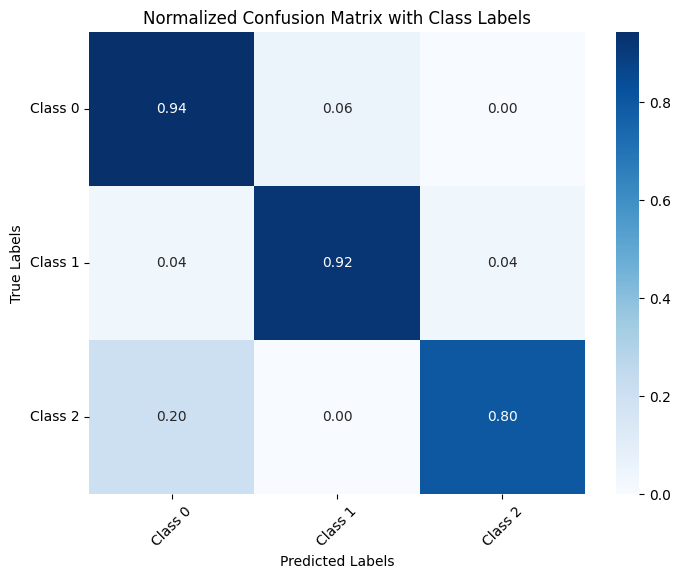

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

class_names = ['Class 0', 'Class 1', 'Class 2']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix with Class Labels')

plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()